In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname='/Users/hoon/Library/Fonts/NanumSquareRegular.ttf').get_name()
plt.rc("font", family=font_name)
import matplotlib as mpl
mpl.rcParams["axes.unicode_minus"] = False

# 공공자전거 분석 대여

### 1. 데이터 준비

In [56]:
bike = pd.read_csv("data/SeoulBikeData.csv", encoding='euc-kr')

In [37]:
bike.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [38]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

### 2. EDA 문제 풀이

In [39]:
#### 시간대별로 평균 몇 대가 대여되었을까?
bike.groupby('Hour')['Rented Bike Count'].mean()

Hour
0      541.460274
1      426.183562
2      301.630137
3      203.331507
4      132.591781
5      139.082192
6      287.564384
7      606.005479
8     1015.701370
9      645.983562
10     527.821918
11     600.852055
12     699.441096
13     733.246575
14     758.824658
15     829.186301
16     930.621918
17    1138.509589
18    1502.926027
19    1195.147945
20    1068.964384
21    1031.449315
22     922.797260
23     671.126027
Name: Rented Bike Count, dtype: float64

Text(16, 150, '퇴근')

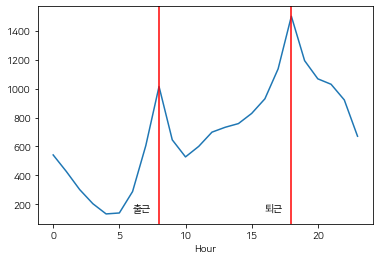

In [40]:
#### 위 내용을 시각화(선그래프로)
bike.groupby('Hour')['Rented Bike Count'].mean().plot()
plt.axvline(x=8, color = 'r')
plt.axvline(x=18, color = 'r')
plt.text(6, 150, "출근")
plt.text(16, 150, "퇴근")

In [57]:
#### DATE에서 WEEKDAYS 파생변수 만들기
import datetime as dt
bike["Weekdays"] = pd.to_datetime(bike['Date'], format="%d/%m/%Y").dt.strftime('%A')
bike

#요일을 Fullname으로? series.dt.strftime('%A')
#요일을 숫자로? series.dt.dayofweek




,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Weekdays
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday


In [58]:
# 수작업 방식
bike.loc[:, 'Date'] = pd.to_datetime(bike["Date"], format="%d/%m/%Y")

diff = (bike['Date'] - pd.to_datetime('2016-01-01')).astype(str) # 날짜별 차이. 2016년 1월 1일이 금요일이니 이 차이가 7로 나눠지면 금요일...
diff
diff_num = diff.str.split(" ", expand=True)[0].astype(int)
diff_num

def weekdays(x):
    if x % 7 == 0:
        return "금요일"
    elif x % 7 == 1:
        return "토요일"
    elif x % 7 == 2:
        return "일요일"
    elif x % 7 == 3:
        return "월요일"
    elif x % 7 == 4:
        return "화요일"
    elif x % 7 == 5:
        return "수요일"
    elif x % 7 == 6:
        return "목요일"

bike['Weekdays2'] = diff_num.transform(weekdays)
bike['Weekdays2'].head(50)

0     금요일
1     금요일
2     금요일
3     금요일
4     금요일
5     금요일
6     금요일
7     금요일
8     금요일
9     금요일
10    금요일
11    금요일
12    금요일
13    금요일
14    금요일
15    금요일
16    금요일
17    금요일
18    금요일
19    금요일
20    금요일
21    금요일
22    금요일
23    금요일
24    토요일
25    토요일
26    토요일
27    토요일
28    토요일
29    토요일
30    토요일
31    토요일
32    토요일
33    토요일
34    토요일
35    토요일
36    토요일
37    토요일
38    토요일
39    토요일
40    토요일
41    토요일
42    토요일
43    토요일
44    토요일
45    토요일
46    토요일
47    토요일
48    일요일
49    일요일
Name: Weekdays2, dtype: object

In [59]:
bike["Weekday2"] = ((pd.to_datetime(bike["Date"], format="%d/%m/%Y") - pd.to_datetime('2016-01-01')).dt.days) % 7

bike["Weekday2"] = bike["Weekday2"].map({0:'금요일', 1:'토요일', 2:'일요일', 3:'월요일', 4:'화요일', 5:'수요일', 6:'목요일'})

bike["Weekday2"].head(50)


0     금요일
1     금요일
2     금요일
3     금요일
4     금요일
5     금요일
6     금요일
7     금요일
8     금요일
9     금요일
10    금요일
11    금요일
12    금요일
13    금요일
14    금요일
15    금요일
16    금요일
17    금요일
18    금요일
19    금요일
20    금요일
21    금요일
22    금요일
23    금요일
24    토요일
25    토요일
26    토요일
27    토요일
28    토요일
29    토요일
30    토요일
31    토요일
32    토요일
33    토요일
34    토요일
35    토요일
36    토요일
37    토요일
38    토요일
39    토요일
40    토요일
41    토요일
42    토요일
43    토요일
44    토요일
45    토요일
46    토요일
47    토요일
48    일요일
49    일요일
Name: Weekday2, dtype: object

In [61]:
bike.groupby('Weekday2')['Rented Bike Count'].mean()
bike.groupby('Weekdays')['Rented Bike Count'].mean()

Weekdays
Friday       747.117925
Monday       730.563301
Saturday     709.528846
Sunday       625.155449
Thursday     690.704327
Tuesday      687.977564
Wednesday    740.349359
Name: Rented Bike Count, dtype: float64

<AxesSubplot:xlabel='Weekday2', ylabel='Rented Bike Count'>

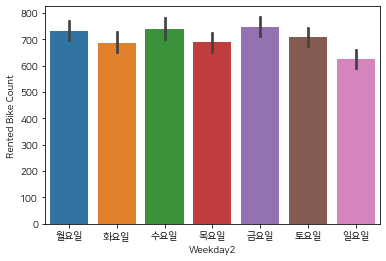

In [63]:
sns.barplot(x='Weekday2', y="Rented Bike Count", data=bike, order = ["월요일", "화요일", "수요일", "목요일", "금요일", "토요일", "일요일"])

/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will re

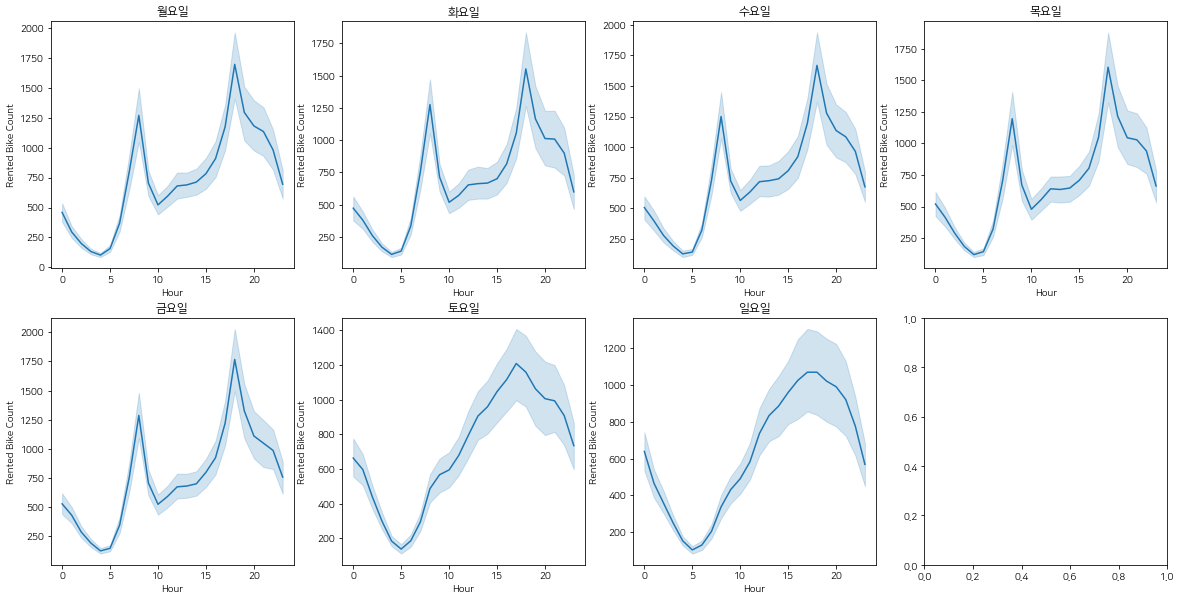

In [70]:
#### 요일별로 시간대별 그래프 시각화

f, ax = plt.subplots(2,4,figsize=(20,10))

weekdays_list = ["월요일", "화요일", "수요일", "목요일", "금요일", "토요일", "일요일"]

for i in range(7):
    sns.lineplot("Hour", "Rented Bike Count", data = bike.loc[bike.Weekday2 == weekdays_list[i]], ax = ax[i//4, i%4])
    ax[i//4, i%4].set_title(weekdays_list[i])
